In [1]:
from sklearn import tree
from nltk.corpus import stopwords
import spacy
import pandas as pd
import numpy as np
import graphviz 
from sklearn.feature_extraction.text import CountVectorizer
from IPython.display import display

load data

In [2]:
df = pd.read_csv("./twitter_data/exploration_dataset.csv")

load models and stopwords

In [3]:
nlp = spacy.load("en_core_web_sm")
vectorizer = CountVectorizer()
stop_words = set(stopwords.words('english')) 

Corpus lemmatization

In [29]:
corpus = []
tweet_ids = []
Y = []
for idx, row in df.iterrows():
    if row['tweet_id'] not in tweet_ids:
        doc = nlp(row['text']) # spacy sintactic parsing
        filtered_sentence = [t.lemma_ for t in doc if not t.lemma_ in stop_words] 
        corpus.append(" ".join(filtered_sentence))
        if row['label'] != 'none':
            Y.append(1)
        else:
            Y.append(0)
        tweet_ids.append(row['tweet_id'])
print(corpus[:10])

['girlNOUN equivalentNOUN irritateVERB asianADJ girlNOUN coupleNOUN yearNOUN agoADV .PUNCT wellINTJ ,PUNCT 7NUM .PUNCT #NOUN mkrNOUN', 'DraskoPROPN -PRON-PRON cookVERB halfDET birdNOUN -PRON-PRON idiotVERB #SYM mkrVERB', 'hopefullyADV someonePRON cookVERB DraskoPROPN nextADJ epNOUN #SYM mkrNOUN', 'courseNOUN -PRON-PRON bearVERB serbiaPROPN ...PUNCT fuckVERB SerbianPROPN filmNOUN #NOUN mkrNOUN', '#NOUN MKRPROPN  SPACE loseVERB plotNOUN -PUNCT bigADJ TexanPROPN elephantNOUN sizedADJ steakNOUN -PRON-PRON brekkieNOUN ?PUNCT', 'DraskoPROPN sayVERB -PRON-PRON impressedADJ girlNOUN cookVERB halfDET chickenNOUN ..PUNCT -PRON-PRON cookVERB wholeADJ oneNUM  SPACE #NOUN mkrNOUN', '-PRON-PRON wellADJ lookVERB shitNOUN twoNUM !PUNCT #NOUN MKR2015PROPN #SYM mkrNOUN #SYM killerblondeNOUN', 'faceNOUN uglyADJ promoNOUN girlNOUN !PUNCT faceNOUN likeSCONJ catNOUN arseholeNOUN #PROPN mkrVERB excitedADJ seeVERB them@goPROPN tonightNOUN ...PUNCT literallyADV http://t.co/HgoJrfoIeOPUNCT', '@mykitchenrulesPUN

transform corpus to word vector (one hot coding)

In [30]:
X = vectorizer.fit_transform(corpus)
print(X)

(0, 6988)	2
  (0, 5598)	1
  (0, 8569)	1
  (0, 1440)	1
  (0, 3923)	1
  (0, 18951)	1
  (0, 848)	1
  (0, 13477)	3
  (0, 18434)	1
  (0, 425)	1
  (0, 11880)	1
  (0, 11064)	1
  (1, 5062)	1
  (1, 13360)	4
  (1, 3849)	1
  (1, 7449)	1
  (1, 2142)	1
  (1, 8114)	1
  (1, 16455)	1
  (1, 11069)	1
  (2, 11064)	1
  (2, 5062)	1
  (2, 3849)	1
  (2, 16455)	1
  (2, 7871)	1
  :	:
  (10580, 1633)	1
  (10580, 8498)	1
  (10580, 6739)	1
  (10580, 8627)	1
  (10581, 13375)	2
  (10581, 8498)	1
  (10581, 8352)	1
  (10581, 4287)	1
  (10582, 11880)	1
  (10582, 13375)	3
  (10582, 8498)	3
  (10582, 2020)	1
  (10583, 13477)	2
  (10583, 13360)	4
  (10583, 6912)	1
  (10583, 9507)	1
  (10583, 11610)	1
  (10583, 5694)	1
  (10583, 14769)	1
  (10584, 13477)	3
  (10584, 13360)	2
  (10584, 13375)	7
  (10584, 9841)	1
  (10584, 7167)	1
  (10584, 12480)	1


Create and fit tree

In [31]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=10)
clf = clf.fit(X, Y)

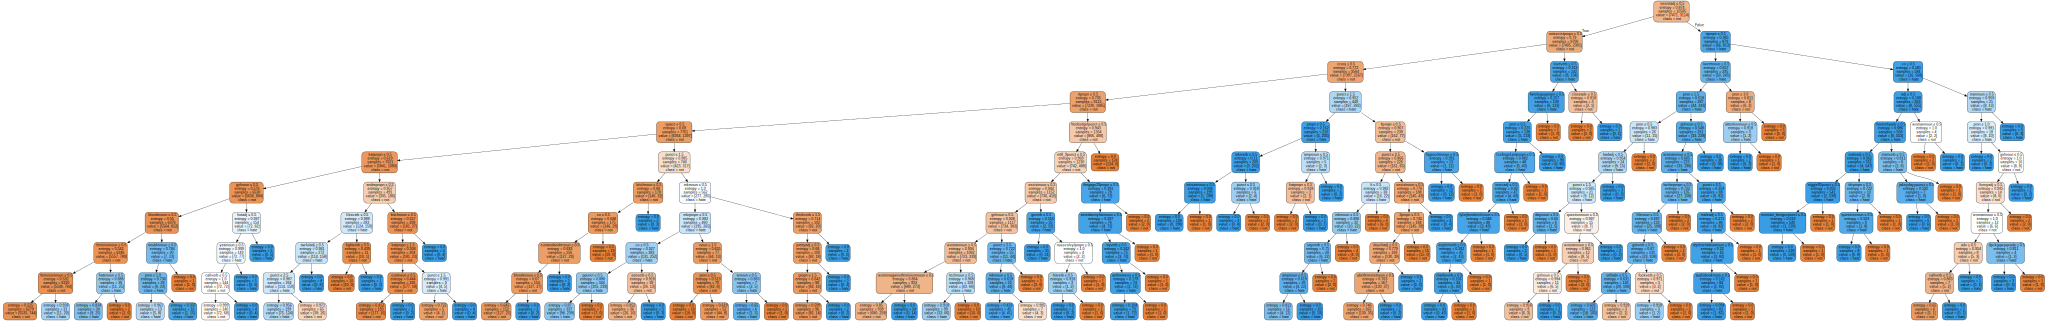

In [32]:
dot_data = tree.export_graphviz(clf, out_file=None,
    class_names=['not','hate'],
    feature_names=vectorizer.get_feature_names(),
    filled=True, rounded=True,  special_characters=True) 

graph = graphviz.Source(dot_data) 
graph.render("./twitter_data/tree") 

display(graphviz.Source(dot_data))

In [7]:
a = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

In [8]:
a.head()

,00,000,00simmerforlife,01,02,02jbywfj2f,05,06apcfgdf0,0cclus,0idinjglje,...,zvw6lcpgyk,zwstmbhno4,zy3chiaq7f,zy5d95bk6e,zy9bc5kjdz,zydzshc4ql,zyhosbrfff,zynga,zython86,zzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
a.to_csv("./twitter_data/word_vector.csv")